In [8]:
# let's draw what we are working with
from gstools import SRF, Gaussian
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

x = y = range(100)
model = Gaussian(dim=3, var=1, len_scale=10)
srf = SRF(model, seed=20170519)
#field = srf.structured([x, y, 0])
#srf.plot()
num_steps = 100
frames = [srf.structured([x,y,i]) for i in range(num_steps)]



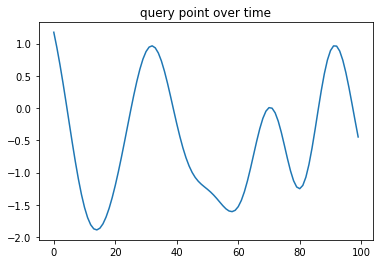

In [57]:
# visualize the query point
import numpy as np
frames= np.array(frames)
ts = frames[50,50,:]
plt.title('query point over time')
plt.plot(ts)

<ipython-input-73-7af1cf82c677>:42: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  pts = np.array(pts).T[:2].T.tolist()


"\n\npath = Path([pt1,pt2], codes)\npatch = patches.PathPatch(path, facecolor='orange', lw=2)\nax.add_patch(patch)\nplt.scatter([50],[50],c='r')\n"

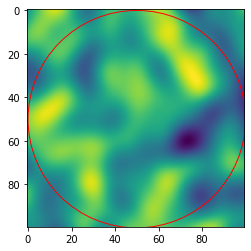

In [73]:
from matplotlib.path import Path
import matplotlib.patches as patches
import math
from copy import copy
# create list of measurement lines
fig, ax = plt.subplots()
ax.imshow(frames[0])
codes = [
    Path.MOVETO,
    Path.LINETO,]
c = plt.Circle((50, 50), 50, color='r',fill=False)
ax.add_patch(c)

# generating sequence of 

def circle_points(rad):
    angle1 = np.random.uniform(0,2*math.pi)
    angle2 = np.random.uniform(0,2*math.pi)
    x1 = [ rad*np.cos(angle1)+50, rad*np.sin(angle1)  +50]
    x2 = [ rad*np.cos(angle2)+50, rad*np.sin(angle2)  +50 ]

    return x1, x2,angle1,angle2

# needs the previous angles
def circle_points_next(rad, angle1_p, angle2_p):
    if angle1_p < angle2_p:
        # swap them
        temp = angle2_p
        angle2_p = angle1_p
        angle1_p = temp
    angle1 = np.random.uniform(angle2_p,angle1_p)
    angle2 = np.random.uniform( angle1_p-2*math.pi , angle2_p)
    x1 = [ rad*np.cos(angle1)+50, rad*np.sin(angle1)  +50]
    x2 = [ rad*np.cos(angle2)+50, rad*np.sin(angle2)  +50 ]

    return x1, x2,angle1,angle2

# sequence of 20 points
pts = [circle_points(50)]
while len(pts)<20:
    pts.append( circle_points_next(50,pts[-1][2], pts[-1][3] )) 
pts = np.array(pts).T[:2].T.tolist()
#print(pts.shape)

chords = []
for pt in pts:
    path = Path(pt, codes)
    patch = patches.PathPatch(path, facecolor='orange', lw=2)
    chords.append(copy(patch))


"""

path = Path([pt1,pt2], codes)
patch = patches.PathPatch(path, facecolor='orange', lw=2)
ax.add_patch(patch)
plt.scatter([50],[50],c='r')
"""



animating!


RuntimeError: Can not put single artist in more than one figure

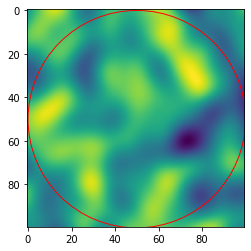

In [78]:

def animate_srf(frames, chords, saveto):
    fig, ax = plt.subplots()
    xdata, ydata = [], []
    ln, = ax.plot([], [], 'ro')

    chord_times = np.linspace(0,len(frames), len(chords))

    def init():
        #grid = srf.structured([x, y, 0])
        ax.imshow(frames[0])
        c = plt.Circle((50, 50), 50, color='r',fill=False)
        ax.add_patch(c)
        ax.add_patch(chords[0])
        ax.scatter([50],[50],c='r')
        return ln,

    def update(frame):
        plt.cla()
        #grid=srf.structured([x, y, frames[gr]])
        #plt.scatter([50],[50],'rx')
        ax.imshow(frames[frame])
        c = plt.Circle((50, 50), 50, color='r',fill=False)
        ax.add_patch(c)
        ax.scatter([50],[50],c='r')
        #k=0
        #while frame>=chord_times[k]:
        #    k+=1
        #ax.add_patch(chords[0])
        return ln,
    
    print('animating!')
    ani = FuncAnimation(fig, update, frames=list(range(len(frames))), init_func=init, blit=True)
    ani.save(saveto, writer='pillow', fps=60)

animate_srf(frames,chords,saveto='toy2.gif')
